# **Modeling**

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

#Sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Scipy
from scipy.sparse import csr_matrix

#Warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
#Loading in the data from the previous notebook
fd = pd.read_csv('fd')

In [3]:
#Taking a glance at the data to ensure it was laoded properly
fd.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date,Product Total,Delivery,Nontaxable Delivery,Wire Out Fee,Discount,Gift Cards,Tax,Tips,Grand Total,Payment Method,Order Type,Order Method,Year
0,100017453,Sale,03:28:16PM Sat,2018-12-29,2018-12-29,815.00,$0.00,0.0,0.0,0.00,0.0,79.46,0.0,894.46,Credit Card,Taken,Phone,2018
1,100017452,Sale,03:16:50PM Sat,2018-12-29,2018-12-29,249.90,$0.00,0.0,0.0,-124.96,0.0,12.19,0.0,137.13,Credit Card,Taken,Walk-In,2018
2,100017451,Sale,02:58:53PM Sat,2018-12-29,2018-12-29,24.95,$0.00,0.0,0.0,0.00,0.0,2.43,0.0,27.38,Credit Card,Taken,Walk-In,2018
3,100017450,Sale,02:54:45PM Sat,2018-12-29,2018-12-29,635.00,$0.00,0.0,0.0,0.00,0.0,61.91,0.0,696.91,Credit Card,Taken,Phone,2018
4,100017202,Sale,02:48:15PM Sat,2018-12-29,2018-12-23,702.00,$0.00,25.0,0.0,0.00,0.0,68.45,0.0,795.45,Credit Card,Delivery,Walk-In,2018


In [4]:
# Looking at the data types  and ensure there are no missing values
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46062 entries, 0 to 46061
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              46062 non-null  int64  
 1   Transaction Type     46062 non-null  object 
 2   Order Time           46062 non-null  object 
 3   Order Date           46062 non-null  object 
 4   Delivery Date        46062 non-null  object 
 5   Product Total        46062 non-null  float64
 6   Delivery             46062 non-null  object 
 7   Nontaxable Delivery  46062 non-null  float64
 8   Wire Out Fee         46062 non-null  float64
 9   Discount             46062 non-null  float64
 10  Gift Cards           46062 non-null  float64
 11  Tax                  46062 non-null  float64
 12  Tips                 46062 non-null  float64
 13  Grand Total          46062 non-null  float64
 14  Payment Method       46062 non-null  object 
 15  Order Type           46062 non-null 

# **Feature Engineering**

In [5]:
# Filtering out the years 2016 & 2017 because the data for those years is incomplete, and also could be considered irrelevant because of how old it is.
filtered_data = fd[(fd['Year'] != 2016) & (fd['Year'] != 2017)]

In [6]:
#Spliting up the 'Delivery Date' column into indiviual columns for year, month, and day to prepare the data for modeling.
fd['Delivery Date'] = pd.to_datetime(fd['Delivery Date'])
fd['Delivery Year'] = fd['Delivery Date'].dt.year
fd['Delivery Day'] = fd['Delivery Date'].dt.day
fd['Delivery Month'] = fd['Delivery Date'].dt.month

#Spliting up the 'Order Date' column into indiviual columns for year, month, and day to prepare the data for modeling.
fd['Order Date'] = pd.to_datetime(fd['Order Date'])
fd['Order Year'] = fd['Order Date'].dt.year
fd['Order Day'] = fd['Order Date'].dt.day
fd['Order Month'] = fd['Order Date'].dt.month

In [7]:
#Confirming the new columns were formed properly
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46062 entries, 0 to 46061
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order #              46062 non-null  int64         
 1   Transaction Type     46062 non-null  object        
 2   Order Time           46062 non-null  object        
 3   Order Date           46062 non-null  datetime64[ns]
 4   Delivery Date        46062 non-null  datetime64[ns]
 5   Product Total        46062 non-null  float64       
 6   Delivery             46062 non-null  object        
 7   Nontaxable Delivery  46062 non-null  float64       
 8   Wire Out Fee         46062 non-null  float64       
 9   Discount             46062 non-null  float64       
 10  Gift Cards           46062 non-null  float64       
 11  Tax                  46062 non-null  float64       
 12  Tips                 46062 non-null  float64       
 13  Grand Total          46062 non-

### **Visualizations**

In [8]:
#Gouping the product total by each individual year for the sake of visualization
product_total_by_year = filtered_data.groupby('Year')['Product Total'].sum().reset_index()

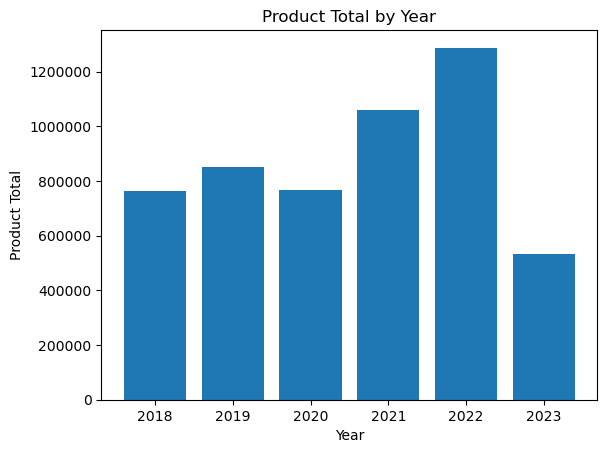

In [9]:
# Create barplot
plt.bar(product_total_by_year['Year'], product_total_by_year['Product Total'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Product Total')
plt.title('Product Total by Year');
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [10]:
#Gouping the product total by each individual year for the sake of visualization
grand_total_by_year = filtered_data.groupby('Year')['Grand Total'].sum().reset_index()

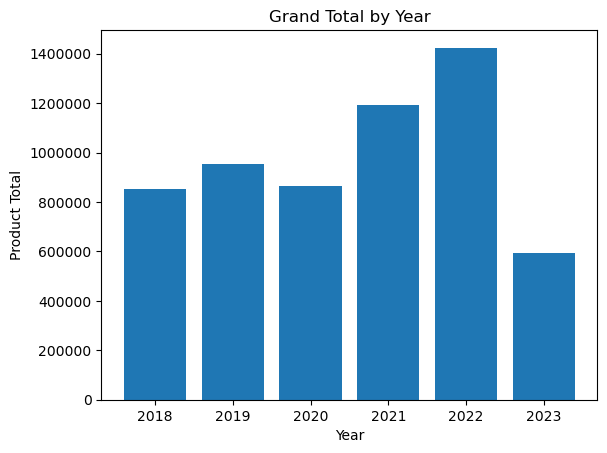

In [11]:
# Create barplot
plt.bar(grand_total_by_year['Year'], grand_total_by_year['Grand Total'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Product Total')
plt.title('Grand Total by Year')
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

### **More Feature Engineering**

The approach described in the provided Python code is a good starting point for handling missing data in your sales data for a floral shop. However, feature engineering is a broader concept that goes beyond just handling missing values. It involves creating new features or transforming existing ones to improve the performance of your machine learning model. Let's discuss some additional considerations for feature engineering in the context of your floral shop sales data:

Domain-Specific Features: Consider creating features that are specific to the floral shop domain. For example, you could create features like "IsSpecialOccasion" based on holidays or special events, "DayOfWeek" to capture weekly patterns, or "IsWeekend" to indicate whether the order was placed on a weekend.

Time-Based Features: Since you have date columns, you can extract various time-based features such as day of the week, month, quarter, and year. These features can help capture seasonal patterns and trends.

Aggregations: Create aggregated features to capture higher-level trends. For example, you could calculate the total sales for each customer or the average order value for different product categories.

Lagged Features: Create lagged features to capture historical behavior. For instance, you could include the total sales for the previous day or the change in sales compared to the same day in the previous week.

Interaction Features: Combine existing features to create new interactions that might have predictive power. For example, you could multiply the quantity of an item ordered by its price to create a "TotalRevenue" feature.

Target Encoding: If you have categorical features that represent different items or categories, you could encode them based on their relationship with the target variable (sales in this case) to capture their impact on sales.

External Data: If available, consider incorporating external data that could influence floral shop sales, such as weather data (temperature, precipitation), local events, or economic indicators.

Dimensionality Reduction: If you have a high-dimensional dataset, techniques like Principal Component Analysis (PCA) or feature selection methods can help reduce the number of features while preserving important information.

Scaling and Transformation: Depending on the distribution of your numerical features, you might need to apply scaling (e.g., Min-Max scaling or Standardization) to ensure that features are on similar scales.

Feature Importance Analysis: After creating your features, analyze their importance in relation to your target variable. This can help you identify which features are contributing the most to the predictive power of your model.

Iterative Refinement: Feature engineering is often an iterative process. After building an initial model, you can analyze the model's performance and adjust your features accordingly to improve predictive accuracy.

Remember that the best approach for feature engineering depends on your specific dataset, the characteristics of your floral shop sales data, and the modeling techniques you plan to use. It's a combination of domain knowledge, experimentation, and understanding the relationships within your data.

In [12]:
transformed_data = fd

In [13]:
print(transformed_data)

         Order # Transaction Type      Order Time Order Date Delivery Date  \
0      100017453             Sale  03:28:16PM Sat 2018-12-29    2018-12-29   
1      100017452             Sale  03:16:50PM Sat 2018-12-29    2018-12-29   
2      100017451             Sale  02:58:53PM Sat 2018-12-29    2018-12-29   
3      100017450             Sale  02:54:45PM Sat 2018-12-29    2018-12-29   
4      100017202             Sale  02:48:15PM Sat 2018-12-29    2018-12-23   
...          ...              ...             ...        ...           ...   
46057  100053354             Sale  08:59:44AM Tue 2023-01-03    2023-01-03   
46058  100053353             Sale  08:57:34AM Tue 2023-01-03    2023-01-03   
46059  100053352             Sale  08:55:04AM Tue 2023-01-03    2023-01-03   
46060  100053351             Sale  08:48:31AM Tue 2023-01-03    2023-01-03   
46061  100053350             Sale  08:44:51AM Tue 2023-01-03    2023-01-03   

       Product Total Delivery  Nontaxable Delivery  Wire Out Fe

In [14]:
# List of columns to drop
columns_to_drop = ['Tax', 'Wire Out Fee', 'Tips', 'Discount', 'Gift Cards', 'Nontaxable Delivery', 'Order Type', 'Delivery', 'Payment Method', 'Order Method', 'Delivery Date', 'Transaction Type', 'Order Time', 'Order Date', 'Year']
transformed_data.drop(columns=columns_to_drop, inplace=True)
X_reduced = transformed_data 

In [15]:
fd = X_reduced
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46062 entries, 0 to 46061
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order #         46062 non-null  int64  
 1   Product Total   46062 non-null  float64
 2   Grand Total     46062 non-null  float64
 3   Delivery Year   46062 non-null  int64  
 4   Delivery Day    46062 non-null  int64  
 5   Delivery Month  46062 non-null  int64  
 6   Order Year      46062 non-null  int64  
 7   Order Day       46062 non-null  int64  
 8   Order Month     46062 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.2 MB


In [16]:
fd.head()

,Order #,Product Total,Grand Total,Delivery Year,Delivery Day,Delivery Month,Order Year,Order Day,Order Month
0,100017453,815.00,894.46,2018,29,12,2018,29,12
1,100017452,249.90,137.13,2018,29,12,2018,29,12
2,100017451,24.95,27.38,2018,29,12,2018,29,12
3,100017450,635.00,696.91,2018,29,12,2018,29,12
4,100017202,702.00,795.45,2018,23,12,2018,29,12


### **Validation Split**

In [17]:
# Drop the target column to separate it from the features
X = fd.drop(columns='Grand Total')
y = fd['Grand Total']

In [18]:
#Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy= 'mean')

#Scaler
scaler = StandardScaler()

#OneHotEncoder
ohe =OneHotEncoder(handle_unknown='ignore', sparse=True)

#Create Selectors
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include='number')

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

#cat pipe
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

#Make tuples for preprocessing the categorical and numeric columns
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)          

In [20]:
#Create Column Transformer
preprocessor= make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [21]:
print(X_train.dtypes)

Order #             int64
Product Total     float64
Delivery Year       int64
Delivery Day        int64
Delivery Month      int64
Order Year          int64
Order Day           int64
Order Month         int64
dtype: object


In [22]:
# Preprocess the data
# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

In [23]:
# Looking at how the preprocessor is organized
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002760ED5E4F0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002760ED5E100>)])

In [24]:
# Ensuring the shape is correct
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("y_train shape:", y_train.shape)

X_train_preprocessed shape: (34546, 8)
y_train shape: (34546,)


## **Linear Regression Model**

In [25]:
# Create a LinearRegression model
regressor = LinearRegression()

# Train the model using the preprocessed training sets
regressor.fit(X_train_preprocessed, y_train)

# Make predictions for training data
y_predictions_train = regressor.predict(X_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_preprocessed)

### **Tuning Hyperparameters**

In [26]:
#Function for evaluating Model preformance
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [27]:
## Evaluate model's performance
evaluate_model(y_train, y_predictions_train,split='training')
evaluate_model(y_test, y_pred,split='testing')

Results for training data:
  - R^2 = -68730864093.04
  - MAE = 31272481.788
  - MSE = 2770656803286024.5
  - RMSE = 52637028.823

Results for testing data:
  - R^2 = 0.94
  - MAE = 13.926
  - MSE = 1812.342
  - RMSE = 42.572



In [28]:
# Splitting the training set further for hyperparameter tuning
X_train_tune, X_val, y_train_tune, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'normalize': [True, False],   # Whether to normalize the features before fitting the model
    'copy_X': [True, False],          # Whether to copy the input data; set to False when using larger datasets
    'positive': [True, False]         # Restrict coefficients to be positive
}

# Create the Linear Regression model
model = regressor

# Initialize the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=12, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(X_train_tune, y_train_tune)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred_val = best_model.predict(X_val)

# Calculate RMSE for the validation set
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
print("Root Mean Squared Error (Validation):", rmse_val)

# Now, you can use the best_model to predict on the test set and calculate RMSE
y_pred_test = best_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("Root Mean Squared Error (Test):", rmse_test)


Root Mean Squared Error (Validation): 35.49055846857412
Root Mean Squared Error (Test): 42.25580940793254


# **Random Forest Regressor model**

In [29]:
#Random forrest Regressor Pipeline
#Fitting the pipeline
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = rf_tree_pipe.predict(X_train)
y_hat_test = rf_tree_pipe.predict(X_test)

In [30]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.994
  - MAE = 3.994
  - MSE = 222.182
  - RMSE = 14.906

Results for testing data:
  - R^2 = 0.916
  - MAE = 10.446
  - MSE = 2549.853
  - RMSE = 50.496



In [31]:
#create a range of max_depth values
n_estimators = [202, 203, 204, 205, 206, 207, 208]

max_depths = [5, 10, 15] 

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

# Loop over the values in n_estimators
for n in n_estimators:
    for max_depth in max_depths:
        # Fit a new model with max_depth
        rf = RandomForestRegressor(random_state=42, n_estimators=n, max_depth=max_depth)

        # Put the model into a pipeline
        rf_pipe = make_pipeline(preprocessor, rf)

        # Fit the model
        rf_pipe.fit(X_train, y_train)

        # Create prediction arrays
        train_pred = rf_pipe.predict(X_train)
        test_pred = rf_pipe.predict(X_test)

        # Evaluate the model using R2 Score
        train_r2score = r2_score(y_train, train_pred)
        test_r2score = r2_score(y_test, test_pred)

        # Store the scores in the scores dataframe
        scores.loc[n, f'Train (max_depth={max_depth})'] = train_r2score
        scores.loc[n, f'Test (max_depth={max_depth})'] = test_r2score

# Print the scores dataframe
print(scores)

    Train Test  Train (max_depth=5)  Test (max_depth=5)  Train (max_depth=10)  \
202   NaN  NaN             0.974399            0.911653              0.990024   
203   NaN  NaN             0.974406            0.911973              0.990024   
204   NaN  NaN             0.974405            0.912040              0.990017   
205   NaN  NaN             0.974413            0.911922              0.990034   
206   NaN  NaN             0.974423            0.911896              0.990054   
207   NaN  NaN             0.974427            0.911755              0.990068   
208   NaN  NaN             0.974458            0.911664              0.990088   

     Test (max_depth=10)  Train (max_depth=15)  Test (max_depth=15)  
202             0.915894              0.993594             0.916199  
203             0.916189              0.993593             0.916480  
204             0.916244              0.993586             0.916565  
205             0.916082              0.993601             0.916400  
2

In [32]:
#Train and test scores
scores

,Train,Test,Train (max_depth=5),Test (max_depth=5),Train (max_depth=10),Test (max_depth=10),Train (max_depth=15),Test (max_depth=15)
202,NaN,NaN,0.974399,0.911653,0.990024,0.915894,0.993594,0.916199
203,NaN,NaN,0.974406,0.911973,0.990024,0.916189,0.993593,0.916480
204,NaN,NaN,0.974405,0.912040,0.990017,0.916244,0.993586,0.916565
205,NaN,NaN,0.974413,0.911922,0.990034,0.916082,0.993601,0.916400
206,NaN,NaN,0.974423,0.911896,0.990054,0.916026,0.993621,0.916337
207,NaN,NaN,0.974427,0.911755,0.990068,0.915912,0.993627,0.916355
208,NaN,NaN,0.974458,0.911664,0.990088,0.915855,0.993650,0.916240


In [33]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

202

In [34]:
#Obtaining the traing and test scores for random forest regression model
best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators, max_depth=5)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for Random Forest Regressor')
evaluate_model(y_train, best_rf_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for Random forest Regressor')
evaluate_model(y_test, best_rf_pipe.predict(X_test), split = 'testing')

Training Scores for Random Forest Regressor
Results for training data:
  - R^2 = 0.974
  - MAE = 12.187
  - MSE = 1032.012
  - RMSE = 32.125



Testing Scores for Random forest Regressor
Results for testing data:
  - R^2 = 0.912
  - MAE = 12.73
  - MSE = 2683.384
  - RMSE = 51.801



# **Save Predictions**

In [35]:
#Saving the new dataframe to upload in the next notebook
fd.to_csv('Predictions', index=False)